In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
Data_train = pd.read_csv("C:/Users/TERMINATOR/Desktop/AV/train_Df64byy.csv")
Data_test = pd.read_csv("C:/Users/TERMINATOR/Desktop/AV/test_YCcRUnU.csv")

In [4]:
Data_train.shape

(50882, 14)

In [5]:
Data_test.shape

(21805, 13)

In [6]:
Data_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [7]:
Data_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [8]:
Data_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [9]:
Data_train.describe(include = np.object)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


In [10]:
Data_test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


In [11]:
Data_test.describe(include = np.object)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,21805,21805,21805,21805,16778,13202
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,14+
freq,3789,12090,17341,18227,5614,1892


In [12]:
Insurance_data = pd.concat([Data_train,Data_test]).reset_index(drop=True)

In [13]:
Insurance_data.shape

(72687, 14)

In [14]:
Insurance_data.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,14+,3.0,1,No,36,Individual,22,11628.0,3213,0.0,36
1,Owned,C5,X2,NaN,NaN,2,No,22,Joint,22,30510.0,1117,0.0,75
2,Owned,C5,NaN,1.0,1.0,3,No,32,Individual,19,7450.0,3732,1.0,32
3,Owned,C24,X1,14+,3.0,4,No,48,Joint,19,17780.0,4378,0.0,52
4,Rented,C8,X2,3.0,1.0,5,No,44,Individual,16,10404.0,2190,0.0,44


In [15]:
Insurance_data.tail()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
72682,Owned,C3,X1,4.0,1.0,72683,No,45,Individual,18,15884.0,1044,NaN,45
72683,Owned,C4,X5,6.0,3.0,72684,No,59,Individual,18,21390.0,266,NaN,59
72684,Owned,C12,X3,NaN,NaN,72685,No,74,Individual,1,17836.0,2470,NaN,74
72685,Rented,C10,X4,3.0,1.0,72686,No,25,Individual,19,11568.0,1676,NaN,25
72686,Owned,C2,X2,14+,2.0,72687,No,73,Individual,3,23040.0,3617,NaN,73


In [16]:
Insurance_data.describe()

,Holding_Policy_Type,ID,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
count,43833.000000,72687.000000,72687.000000,72687.000000,72687.000000,72687.000000,50882.000000,72687.000000
mean,2.439486,36344.000000,42.741632,15.122140,14194.856472,1737.573101,0.239947,44.862713
std,1.029450,20983.073845,17.304194,6.329295,6562.564815,1428.388402,0.427055,17.293563
min,1.000000,1.000000,16.000000,1.000000,2152.000000,1.000000,0.000000,18.000000
25%,1.000000,18172.500000,27.000000,12.000000,9254.000000,527.000000,0.000000,28.000000
50%,3.000000,36344.000000,40.000000,17.000000,13200.000000,1391.000000,0.000000,44.000000
75%,3.000000,54515.500000,57.000000,20.000000,18144.000000,2681.000000,0.000000,59.000000
max,4.000000,72687.000000,75.000000,22.000000,43776.000000,6194.000000,1.000000,75.000000


In [17]:
Insurance_data.describe(include = np.object)

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Is_Spouse,Reco_Insurance_Type
count,72687,72687,55969,43833,72687,72687
unique,2,36,9,15,2,2
top,Owned,C1,X1,1.0,No,Individual
freq,40041,12762,18624,6390,60687,57877


In [18]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 14 columns):
Accomodation_Type          72687 non-null object
City_Code                  72687 non-null object
Health Indicator           55969 non-null object
Holding_Policy_Duration    43833 non-null object
Holding_Policy_Type        43833 non-null float64
ID                         72687 non-null int64
Is_Spouse                  72687 non-null object
Lower_Age                  72687 non-null int64
Reco_Insurance_Type        72687 non-null object
Reco_Policy_Cat            72687 non-null int64
Reco_Policy_Premium        72687 non-null float64
Region_Code                72687 non-null int64
Response                   50882 non-null float64
Upper_Age                  72687 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 7.8+ MB


In [19]:
Insurance_data.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
dtype: int64

In [20]:
Insurance_data.nunique()

Accomodation_Type              2
City_Code                     36
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
ID                         72687
Is_Spouse                      2
Lower_Age                     60
Reco_Insurance_Type            2
Reco_Policy_Cat               22
Reco_Policy_Premium         7685
Region_Code                 5538
Response                       2
Upper_Age                     58
dtype: int64

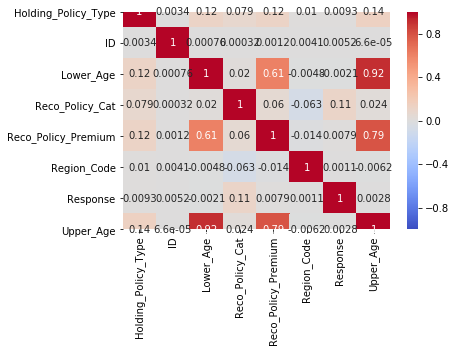

In [21]:
sns.heatmap(Insurance_data.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='coolwarm')

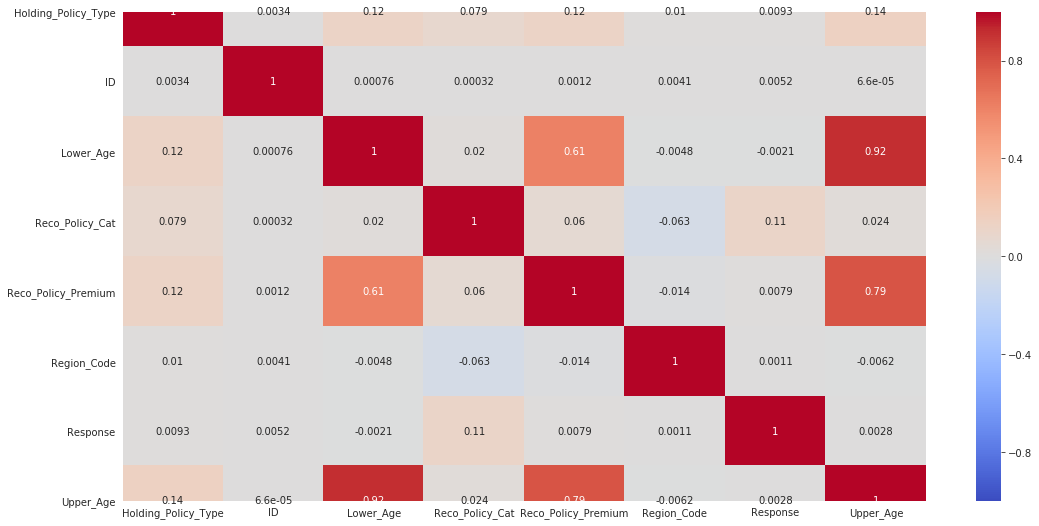

In [22]:
num_corr = Insurance_data.corr()

mask = np.zeros_like(num_corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(num_corr ,vmin = -1,vmax=1, annot = True, cmap="coolwarm")

In [23]:
Insurance_data_1 = Insurance_data.copy()

In [24]:
Insurance_data_1.shape

(72687, 14)

In [25]:
Insurance_data_1 = Insurance_data_1.drop("ID", axis = 1)   # data_2.dropna() - all columns
Insurance_data_1.shape

(72687, 13)

In [26]:
Insurance_data_1['Accomodation_Type'].value_counts()

Owned     40041
Rented    32646
Name: Accomodation_Type, dtype: int64

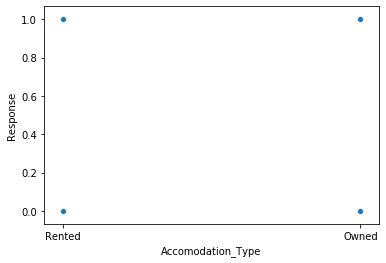

In [27]:
sns.scatterplot(Insurance_data_1['Accomodation_Type'].astype(str),Insurance_data_1['Response'])

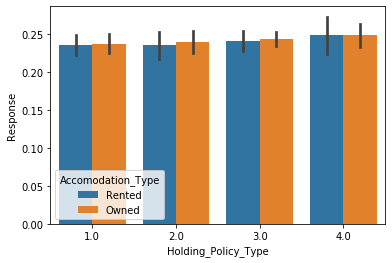

In [28]:
sns.barplot(hue='Accomodation_Type',y='Response',data=Insurance_data_1,x='Holding_Policy_Type')

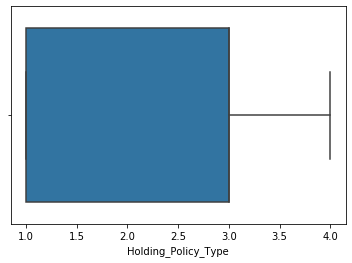

In [29]:
sns.boxplot(Insurance_data_1['Holding_Policy_Type'])

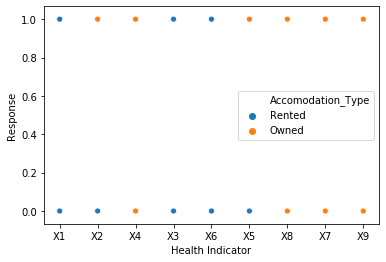

In [30]:
sns.scatterplot(hue='Accomodation_Type',y='Response',data=Insurance_data_1,x='Health Indicator')

In [31]:
Insurance_data_1_miss = Insurance_data_1.isnull().sum() / len(Insurance_data_1) * 100
Insurance_data_1_miss = Insurance_data_1_miss[Insurance_data_1_miss > 0]
Insurance_data_1_miss.sort_values(inplace=True)
Insurance_data_1_miss

Health Indicator           22.999986
Response                   29.998487
Holding_Policy_Duration    39.696232
Holding_Policy_Type        39.696232
dtype: float64

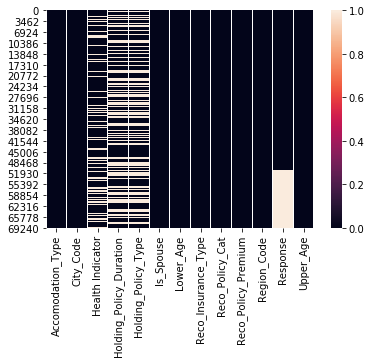

In [32]:
sns.heatmap(Insurance_data_1.isnull())

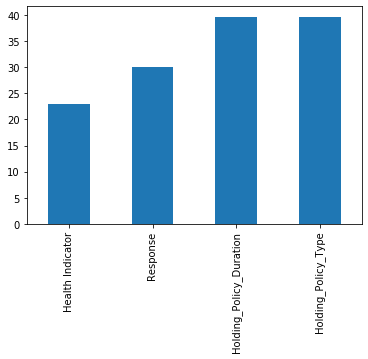

In [33]:
Insurance_data_1_miss.plot(kind = "bar")

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
labelEncoder= LabelEncoder()
Insurance_data_1['City_Code'] = labelEncoder.fit_transform(Insurance_data_1['City_Code'])

In [36]:
Insurance_data_1['Holding_Policy_Duration'].value_counts()

1.0     6390
14+     6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

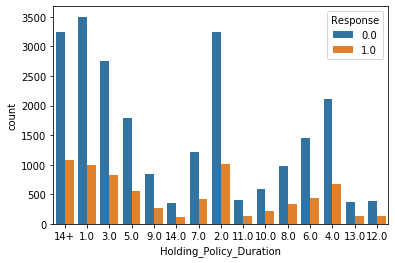

In [37]:
sns.countplot('Holding_Policy_Duration',data=Insurance_data_1,hue='Response')

In [38]:
Insurance_data_1['Holding_Policy_Duration'].replace(to_replace = '\+', value = '',regex = True,inplace = True)
Insurance_data_1['Holding_Policy_Duration']=pd.to_numeric(Insurance_data_1['Holding_Policy_Duration'],errors='raise',downcast=None)

In [39]:
Insurance_data_1['Accomodation_Type'].value_counts()

Owned     40041
Rented    32646
Name: Accomodation_Type, dtype: int64

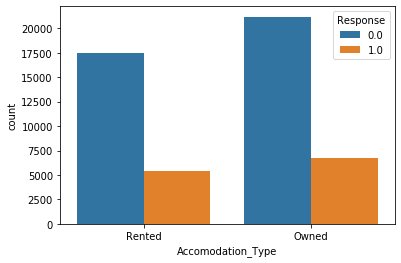

In [40]:
sns.countplot('Accomodation_Type',data=Insurance_data_1,hue='Response')

In [41]:
Insurance_data_1['Accomodation_Type'].replace(to_replace = 'Rented', value = '0',regex = True,inplace = True)
Insurance_data_1['Accomodation_Type'].replace(to_replace = 'Owned', value = '1',regex = True,inplace = True)

In [42]:
Insurance_data_1['Reco_Insurance_Type'].value_counts()

Individual    57877
Joint         14810
Name: Reco_Insurance_Type, dtype: int64

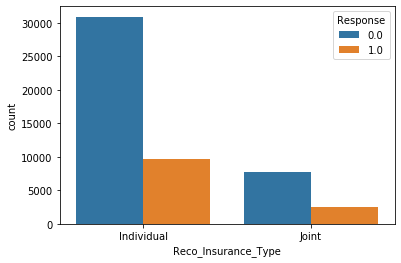

In [43]:
sns.countplot('Reco_Insurance_Type',data=Insurance_data_1,hue='Response')

In [44]:
Insurance_data_1['Reco_Insurance_Type'].replace(to_replace = 'Individual', value = '0',regex = True,inplace = True)
Insurance_data_1['Reco_Insurance_Type'].replace(to_replace = 'Joint', value = '1',regex = True,inplace = True)

In [45]:
Insurance_data_1['Is_Spouse'].value_counts()

No     60687
Yes    12000
Name: Is_Spouse, dtype: int64

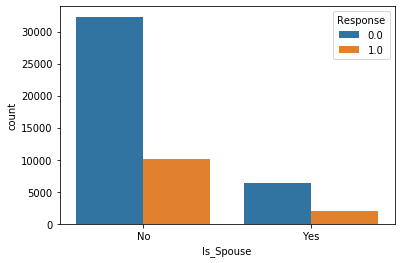

In [46]:
sns.countplot('Is_Spouse',data=Insurance_data_1,hue='Response')

In [47]:
Insurance_data_1['Is_Spouse'].replace(to_replace = 'No', value = '0',regex = True,inplace = True)
Insurance_data_1['Is_Spouse'].replace(to_replace = 'Yes', value = '1',regex = True,inplace = True)

In [48]:
Insurance_data_1['Health Indicator'].value_counts()

X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

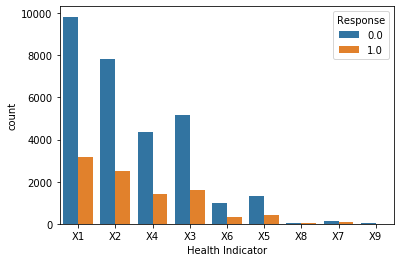

In [49]:
sns.countplot('Health Indicator',data=Insurance_data_1,hue='Response')

In [50]:
Insurance_data_1['Health Indicator'].replace(to_replace = 'X1', value = '0',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X2', value = '1',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X3', value = '2',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X4', value = '3',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X5', value = '4',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X6', value = '5',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X7', value = '6',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X8', value = '7',regex = True,inplace = True)
Insurance_data_1['Health Indicator'].replace(to_replace = 'X9', value = '8',regex = True,inplace = True)

In [51]:
Insurance_data_1['Holding_Policy_Type'].value_counts()

3.0    18851
1.0    11747
2.0     7155
4.0     6080
Name: Holding_Policy_Type, dtype: int64

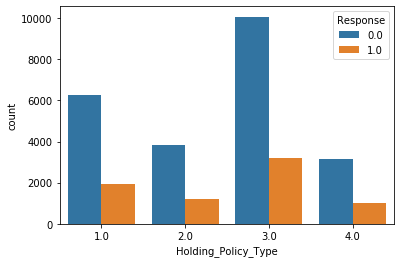

In [52]:
sns.countplot('Holding_Policy_Type',data=Insurance_data_1,hue='Response')

(array([2039., 6180., 6765., 4863., 3947., 3493., 2127., 3110., 3495.,
        3461., 3450., 3520., 3586., 2294., 3405., 3195., 3232., 2493.,
        2462., 5570.]),
 array([18.  , 20.85, 23.7 , 26.55, 29.4 , 32.25, 35.1 , 37.95, 40.8 ,
        43.65, 46.5 , 49.35, 52.2 , 55.05, 57.9 , 60.75, 63.6 , 66.45,
        69.3 , 72.15, 75.  ]),
 <a list of 20 Patch objects>)

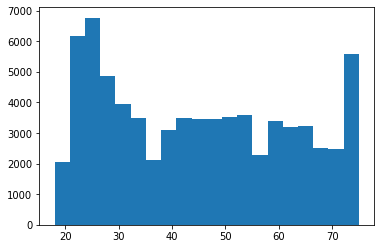

In [53]:
plt.hist(Insurance_data_1['Upper_Age'], bins = 20)

(array([1197., 4451., 7607., 6644., 4853., 3997., 3480., 3100., 3172.,
        3194., 3275., 3209., 3269., 3323., 3156., 2970., 3055., 2251.,
        2158., 4326.]),
 array([16.  , 18.95, 21.9 , 24.85, 27.8 , 30.75, 33.7 , 36.65, 39.6 ,
        42.55, 45.5 , 48.45, 51.4 , 54.35, 57.3 , 60.25, 63.2 , 66.15,
        69.1 , 72.05, 75.  ]),
 <a list of 20 Patch objects>)

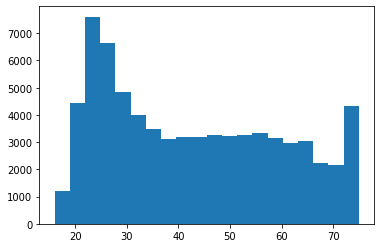

In [54]:
plt.hist(Insurance_data_1['Lower_Age'], bins = 20)

In [55]:
Insurance_data_1['Upper_Age'].value_counts().sort_index(ascending=True)

18     174
19     732
20    1133
21    1601
22    2214
23    2365
24    2374
25    2346
26    2045
27    1750
28    1703
29    1410
30    1389
31    1286
32    1272
33    1177
34    1162
35    1154
36    1066
37    1061
38    1065
39    1005
40    1040
41    1119
42    1179
43    1197
44    1139
45    1134
46    1188
47    1116
48    1197
49    1137
50    1143
51    1148
52    1229
53    1164
54    1163
55    1259
56    1172
57    1122
58    1184
59    1130
60    1091
61    1081
62    1036
63    1078
64    1049
65    1108
66    1075
67     845
68     793
69     855
70     964
71     790
72     708
73     685
74     654
75    4231
Name: Upper_Age, dtype: int64

In [56]:
Insurance_data_1['Mean_Age'] = (Insurance_data_1.Upper_Age + Insurance_data_1.Lower_Age)/2

In [57]:
cols = ['Holding_Policy_Duration','Holding_Policy_Type','Health Indicator']
for col in cols:
    Insurance_data_1[col].fillna(Insurance_data_1[col].median(), inplace=True)

In [58]:
Insurance_data_1.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
Mean_Age                       0
dtype: int64

In [59]:
Insurance_data_1 = Insurance_data_1.drop(['Upper_Age','Lower_Age'],axis=1)

In [60]:
Insurance_data_1.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Is_Spouse                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Mean_Age                       0
dtype: int64

In [61]:
Insurance_data.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,14+,3.0,1,No,36,Individual,22,11628.0,3213,0.0,36
1,Owned,C5,X2,NaN,NaN,2,No,22,Joint,22,30510.0,1117,0.0,75
2,Owned,C5,NaN,1.0,1.0,3,No,32,Individual,19,7450.0,3732,1.0,32
3,Owned,C24,X1,14+,3.0,4,No,48,Joint,19,17780.0,4378,0.0,52
4,Rented,C8,X2,3.0,1.0,5,No,44,Individual,16,10404.0,2190,0.0,44


In [62]:
Id = Insurance_data['ID']
Insurance_data_1 = Insurance_data_1.join(Id)

In [63]:
Insurance_data_1.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Is_Spouse,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Mean_Age,ID
0,0,22,0,14.0,3.0,0,0,22,11628.0,3213,0.0,36.0,1
1,1,31,1,5.0,3.0,0,1,22,30510.0,1117,0.0,48.5,2
2,1,31,1,1.0,1.0,0,0,19,7450.0,3732,1.0,32.0,3
3,1,16,0,14.0,3.0,0,1,19,17780.0,4378,0.0,50.0,4
4,0,34,1,3.0,1.0,0,0,16,10404.0,2190,0.0,44.0,5


In [64]:
Insurance_data_1.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Is_Spouse                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Mean_Age                       0
ID                             0
dtype: int64

In [65]:
InsuranceData_train_cl=Insurance_data_1[Insurance_data_1['Response'].notnull()]
InsuranceData_test_cl=Insurance_data_1[Insurance_data_1['Response'].isnull()]

In [66]:
InsuranceData_train_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50882 entries, 0 to 50881
Data columns (total 13 columns):
Accomodation_Type          50882 non-null object
City_Code                  50882 non-null int32
Health Indicator           50882 non-null object
Holding_Policy_Duration    50882 non-null float64
Holding_Policy_Type        50882 non-null float64
Is_Spouse                  50882 non-null object
Reco_Insurance_Type        50882 non-null object
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Region_Code                50882 non-null int64
Response                   50882 non-null float64
Mean_Age                   50882 non-null float64
ID                         50882 non-null int64
dtypes: float64(5), int32(1), int64(3), object(4)
memory usage: 5.2+ MB


In [67]:
InsuranceData_test_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 50882 to 72686
Data columns (total 13 columns):
Accomodation_Type          21805 non-null object
City_Code                  21805 non-null int32
Health Indicator           21805 non-null object
Holding_Policy_Duration    21805 non-null float64
Holding_Policy_Type        21805 non-null float64
Is_Spouse                  21805 non-null object
Reco_Insurance_Type        21805 non-null object
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
Region_Code                21805 non-null int64
Response                   0 non-null float64
Mean_Age                   21805 non-null float64
ID                         21805 non-null int64
dtypes: float64(5), int32(1), int64(3), object(4)
memory usage: 2.2+ MB


In [68]:
InsuranceData_test_cl.drop('Response',axis=1,inplace=True)

In [69]:
print(InsuranceData_train_cl.shape)
print(InsuranceData_test_cl.shape)

(50882, 13)
(21805, 12)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [71]:
X = InsuranceData_train_cl.drop('Response',axis = 1)
Y = InsuranceData_train_cl['Response']

In [72]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [73]:
X = pd.DataFrame(X)

In [74]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.104046,0.578319,-1.047414,2.377858,0.400939,-0.445367,-0.505203,1.085830,-0.387852,1.039425,-0.459465,-1.732017
1,0.905759,1.319223,-0.267228,-0.173242,0.400939,-0.445367,1.979403,1.085830,2.477394,-0.432415,0.277087,-1.731949
2,0.905759,1.319223,-0.267228,-1.307064,-1.974398,-0.445367,-0.505203,0.612688,-1.021842,1.403874,-0.695162,-1.731881
3,0.905759,0.084382,-1.047414,2.377858,0.400939,-0.445367,1.979403,0.612688,0.545682,1.857504,0.365473,-1.731813
4,-1.104046,1.566192,-0.267228,-0.740153,-1.974398,-0.445367,-0.505203,0.139547,-0.573588,0.321060,0.011928,-1.731744


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , train_size = 0.8, random_state = 100)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_lr)

75.38


In [78]:
import xgboost as xgb
from xgboost import XGBRegressor,XGBModel

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,average_precision_score,r2_score,recall_score,f1_score,roc_auc_score

In [80]:
xgbc=xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
xgbc_prediction = xgbc.predict(X_train)
xgbc_score= accuracy_score(y_train,xgbc_prediction)
print('accuracy Score on train using XGBClassifier:',xgbc_score)

[14:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy Score on train using XGBClassifier: 0.7942513204766


In [86]:
Con_matrix_tr=confusion_matrix(y_train,xgbc_prediction)
print('Confusin metrix:',Con_matrix_tr)

Confusin metrix: [[30843   159]
 [ 8216  1487]]


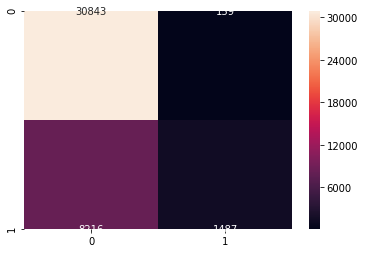

In [81]:
sns.heatmap(confusion_matrix(y_train,xgbc_prediction),annot=True,fmt="d")

In [82]:
print("Classification Report:")
print(classification_report(y_train,xgbc_prediction))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88     31002
         1.0       0.90      0.15      0.26      9703

    accuracy                           0.79     40705
   macro avg       0.85      0.57      0.57     40705
weighted avg       0.82      0.79      0.73     40705



In [83]:
average_precision_tr = average_precision_score(y_train,xgbc_prediction )
Re_score_tr=recall_score(y_train, xgbc_prediction)
F1_score_tr=f1_score(y_train, xgbc_prediction)

In [84]:
xgbc_predict=xgbc.predict(X_test)
accuracy_score_ts= accuracy_score(y_test,xgbc_predict)
Con_matrix_ts=confusion_matrix(y_test,xgbc_predict)
average_precision_ts = average_precision_score(y_test, xgbc_predict)
F1_score_ts=f1_score(y_test, xgbc_predict)
Re_score_ts=recall_score(y_test, xgbc_predict)

In [87]:
data=pd.DataFrame({'Accuracy_score':[xgbc_score,accuracy_score_ts],'Confusion_matrix':[Con_matrix_tr,Con_matrix_ts],
                  'Average_precision_score':[average_precision_tr,average_precision_ts],'recall_score':[Re_score_tr,Re_score_ts]
                  ,'f1_score':[F1_score_tr,F1_score_ts]},
                 index=['Train','Test'])

In [89]:
np.transpose(data)

,Train,Test
Accuracy_score,0.794251,0.750516
Confusion_matrix,"[[30843, 159], [8216, 1487]]","[[7511, 160], [2379, 127]]"
Average_precision_score,0.34029,0.256188
recall_score,0.153252,0.0506784
f1_score,0.26205,0.0909416
